# PFG 5005 - Estudo Dirigido 1: Seções de Poincaré para a Hamiltoniana de Hénon-Heiles

Neste notebook, implementaremos um método de integração numérica simplético para a Hamiltoniana de Hénon-Heiles e o algoritmo de Hénon para construir seções de Poincaré.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 5.1. Equações do Método de Euler Simplético

A Hamiltoniana de Hénon-Heiles é dada por:

[cite_start]$H=\frac{1}{2}(p_{1}^{2}+p_{2}^{2}+q_{1}^{2}+q_{2}^{2})+q_{1}^{2}q_{2}-\frac{1}{3}q_{2}^{3}.$ [cite: 164]

[cite_start]Para aplicar o método de Euler simplético, precisamos das equações de movimento, que são as derivadas da Hamiltoniana em relação às posições e momentos[cite: 34].

$\dot{q_1} = \frac{\partial H}{\partial p_1} = p_1$
$\dot{q_2} = \frac{\partial H}{\partial p_2} = p_2$
$\dot{p_1} = -\frac{\partial H}{\partial q_1} = -(q_1 + 2q_1q_2)$
$\dot{p_2} = -\frac{\partial H}{\partial q_2} = -(q_2 + q_1^2 - q_2^2)$

[cite_start]O método de Euler Simplético para esta Hamiltoniana separável é um mapa que atualiza as posições e momentos em duas etapas[cite: 77]:

1.  **Atualização das Posições:**
    $q_1^{(n+1)}=q_1^{(n)}+\Delta t p_1^{(n)}$
    $q_2^{(n+1)}=q_2^{(n)}+\Delta t p_2^{(n)}$

2.  **Atualização dos Momentos (usando as novas posições):**
    $p_1^{(n+1)}=p_1^{(n)}-\Delta t (q_1^{(n+1)} + 2q_1^{(n+1)}q_2^{(n+1)})$
    $p_2^{(n+1)}=p_2^{(n)}-\Delta t (q_2^{(n+1)} + (q_1^{(n+1)})^2 - (q_2^{(n+1)})^2)$

A seguir, vamos codificar essas equações.

### 5.2. Implementação Computacional

Esta célula contém a lógica principal para a simulação. A função `simulate_henon_heiles` implementa o integrador de Euler Simplético e o algoritmo de Hénon para detectar e registrar os pontos da seção de Poincaré.

[cite_start]A seção de Poincaré será construída no plano $(q_2, p_2)$ para a superfície de seção $q_1=0$, com a condição adicional de $p_1 \ge 0$. [cite: 169]

[cite_start]O algoritmo de Hénon envolve um segundo passo de integração para encontrar o ponto exato de interseção com a superfície de seção[cite: 121, 122]. [cite_start]Para isso, reformulamos as equações de movimento, usando $q_1$ como a variável independente[cite: 106]:

$\frac{dq_2}{dq_1} = \frac{\dot{q_2}}{\dot{q_1}} = \frac{p_2}{p_1}$
$\frac{dp_2}{dq_1} = \frac{\dot{p_2}}{\dot{q_1}} = \frac{-(q_2 + q_1^2 - q_2^2)}{p_1}$

In [4]:
def euler_symplectic_step(q1, q2, p1, p2, dt):
    """
    Realiza um passo de integração usando o método de Euler Simplético.
    """
    # Atualiza as posições
    q1_new = q1 + dt * p1
    q2_new = q2 + dt * p2
    
    # Atualiza os momentos usando as novas posições
    p1_new = p1 - dt * (q1_new + 2 * q1_new * q2_new)
    p2_new = p2 - dt * (q2_new + q1_new**2 - q2_new**2)
    
    return q1_new, q2_new, p1_new, p2_new

def get_poincare_points(initial_state, E_target, dt, num_steps):
    """
    Calcula a trajetória e constrói a seção de Poincaré.
    """
    q1, q2, p1, p2 = initial_state
    
    poincare_points_q2 = []
    poincare_points_p2 = []
    
    # Loop de integração
    for n in range(num_steps):
        # Armazena o estado anterior para detecção de cruzeiro
        q1_old, q2_old, p1_old, p2_old = q1, q2, p1, p2
        
        # Passo de integração principal
        q1, q2, p1, p2 = euler_symplectic_step(q1_old, q2_old, p1_old, p2_old, dt)
        
        # Verifica a condição de cruzamento (passagem de q1=0)
        # e a condição p1 >= 0
        if q1_old * q1 < 0 and p1 >= 0:
            # Algoritmo de Hénon para encontrar o ponto exato
            # As variáveis independentes são dq_1
            # Passo de integração de "ajuste fino"
            d_q1 = 0 - q1_old
            
            # Use um passo de Euler para encontrar o ponto de interseção
            q2_intersec = q2_old + d_q1 * (p2_old / p1_old)
            p2_intersec = p2_old + d_q1 * (-(q2_old + q1_old**2 - q2_old**2) / p1_old)
            
            poincare_points_q2.append(q2_intersec)
            poincare_points_p2.append(p2_intersec)
            
    return poincare_points_q2, poincare_points_p2

### 5.3. Seção de Poincaré para E = 0.08333

[cite_start]Para construir a seção de Poincaré, precisamos de uma condição inicial que satisfaça a energia total $E=0.08333$. Vamos escolher uma condição inicial com $q_1=0$ para começar, e então usar a equação da Hamiltoniana para encontrar o valor de $p_2$. [cite: 129]

$H = E \implies \frac{1}{2}(p_{1}^{2}+p_{2}^{2}+q_{1}^{2}+q_{2}^{2})+q_{1}^{2}q_{2}-\frac{1}{3}q_{2}^{3} = E$

Fixando $q_1=0$, $p_1=0.2$ e $q_2=0$, podemos resolver para $p_2$.

$E = 0.08333$
$0.08333 = \frac{1}{2}(0.2^2 + p_2^2 + 0^2 + 0^2) + 0 - 0$
$0.08333 = \frac{1}{2}(0.04 + p_2^2)$
$0.16666 = 0.04 + p_2^2$
$p_2^2 = 0.12666 \implies p_2 \approx \pm 0.35589$

Vamos usar $p_2 = 0.35589$.

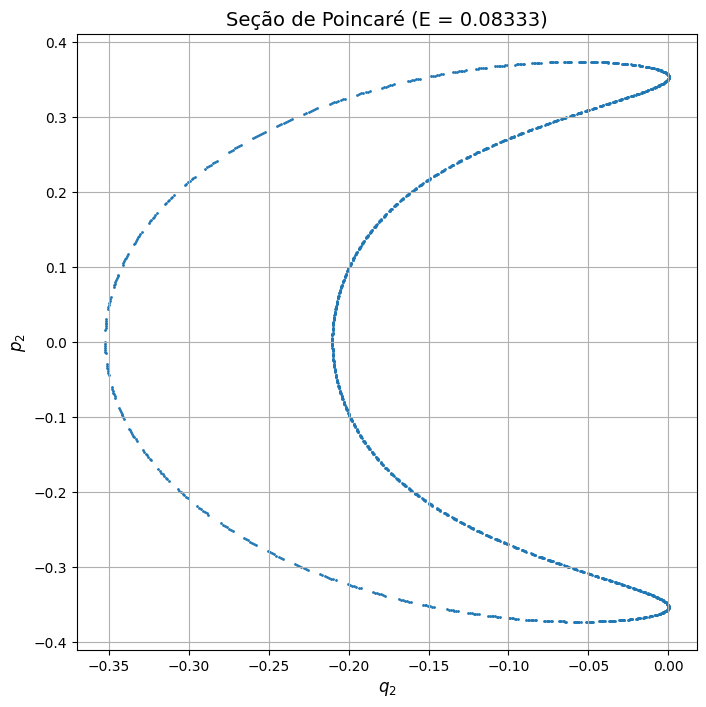

Número de pontos na seção: 1561


In [3]:
# Parâmetros de simulação
E_0 = 0.08333
dt = 0.01
num_steps = 10**6

# Condição inicial que satisfaz a energia E_0
q1_0, q2_0, p1_0, p2_0 = 0.0, 0.0, 0.2, 0.35589

initial_state = (q1_0, q2_0, p1_0, p2_0)

# Construir a seção de Poincaré
q2_points, p2_points = get_poincare_points(initial_state, E_0, dt, num_steps)

# Plotar os resultados
plt.figure(figsize=(8, 8))
plt.scatter(q2_points, p2_points, s=1)
plt.xlabel('$q_2$', fontsize=12)
plt.ylabel('$p_2$', fontsize=12)
plt.title(f'Seção de Poincaré (E = {E_0})', fontsize=14)
plt.grid(True)
plt.show()

print(f"Número de pontos na seção: {len(q2_points)}")

### 5.4. Seção de Poincaré para E = 0.125

Agora, repetimos o processo para a energia $E=0.125$.

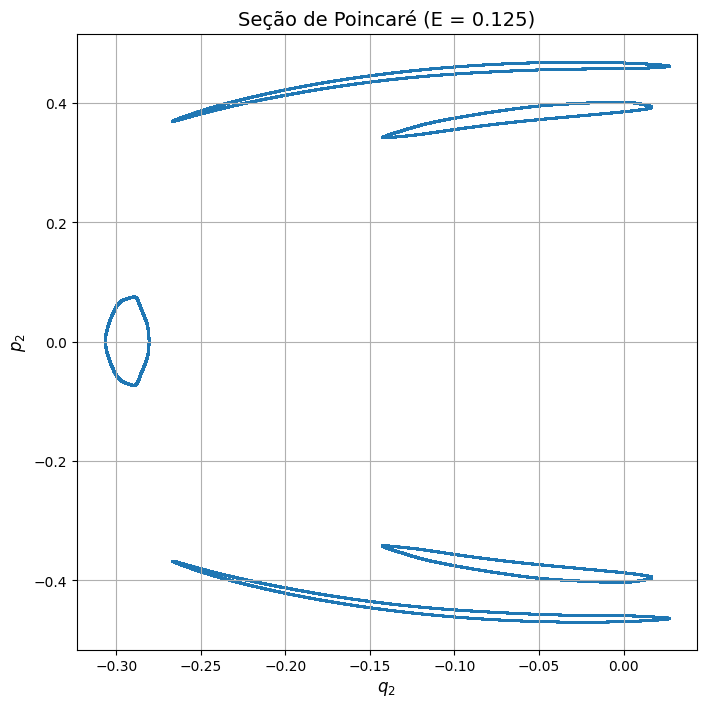

Número de pontos na seção: 154710


In [ ]:
E_1 = 0.125
dt = 0.01
num_steps = 10**8

# Condição inicial para E = 0.125
# 0.125 = 0.5 * (0.2**2 + p_2**2)
# 0.25 = 0.04 + p_2**2
# p_2**2 = 0.21 => p_2 = sqrt(0.21) ~ 0.45826
q1_0, q2_0, p1_0, p2_0 = 0.0, 0.0, 0.2, np.sqrt(0.21)

initial_state = (q1_0, q2_0, p1_0, p2_0)
q2_points, p2_points = get_poincare_points(initial_state, E_1, dt, num_steps)

# Plotar os resultados
plt.figure(figsize=(8, 8))
plt.scatter(q2_points, p2_points, s=1)
plt.xlabel('$q_2$', fontsize=12)
plt.ylabel('$p_2$', fontsize=12)
plt.title(f'Seção de Poincaré (E = {E_1})', fontsize=14)
plt.grid(True)
plt.show()

print(f"Número de pontos na seção: {len(q2_points)}")

Simuladas 1882 trajetórias.
Número total de pontos na seção: 285952


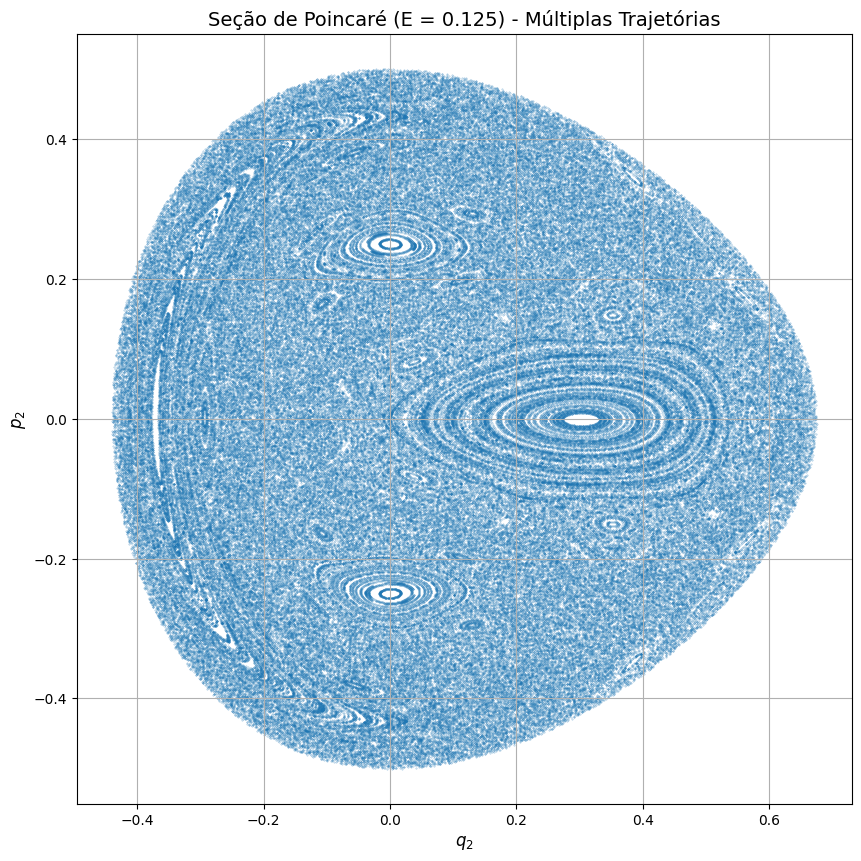

In [4]:
# Parâmetros da simulação
E_target = 0.125
dt = 0.01
num_steps = 10**5 # Usar 10^7 passos é um bom ponto de partida para cada simulação

# Listas para armazenar os pontos de todas as simulações
all_q2_points = []
all_p2_points = []

# Geração de múltiplas condições iniciais em uma grade
q2_vals = np.linspace(-0.5, 0.5, 50)  # 50 pontos para q2
p2_vals = np.linspace(-0.5, 0.5, 50)  # 50 pontos para p2

num_valid_initials = 0
for q2_0 in q2_vals:
    for p2_0 in p2_vals:
        # Calcular p1 para a energia desejada (E_target) e q1=0
        p1_sq = 2 * E_target - (p2_0**2 + q2_0**2) + (2/3) * q2_0**3
        
        if p1_sq >= 0:
            p1_calc = np.sqrt(p1_sq)
            # A condição é p1 >= 0
            initial_state = (0.0, q2_0, p1_calc, p2_0)
            
            # Executar a simulação para esta condição inicial
            q2_points, p2_points = get_poincare_points(initial_state, E_target, dt, num_steps)
            
            # Adicionar os resultados às listas combinadas
            all_q2_points.extend(q2_points)
            all_p2_points.extend(p2_points)
            
            num_valid_initials += 1

print(f"Simuladas {num_valid_initials} trajetórias.")
print(f"Número total de pontos na seção: {len(all_q2_points)}")

# Plotar os resultados combinados
plt.figure(figsize=(10, 10))
plt.scatter(all_q2_points, all_p2_points, s=0.1, alpha=0.5)
plt.xlabel('$q_2$', fontsize=12)
plt.ylabel('$p_2$', fontsize=12)
plt.title(f'Seção de Poincaré (E = {E_target}) - Múltiplas Trajetórias', fontsize=14)
plt.grid(True)
plt.show()

Iniciando a simulação de múltiplas trajetórias...
  > Trajetória 174/2500: Calculando pontos de Poincaré...
  > Trajetória 175/2500: Calculando pontos de Poincaré...
  > Trajetória 176/2500: Calculando pontos de Poincaré...
  > Trajetória 177/2500: Calculando pontos de Poincaré...
  > Trajetória 218/2500: Calculando pontos de Poincaré...
  > Trajetória 219/2500: Calculando pontos de Poincaré...
  > Trajetória 220/2500: Calculando pontos de Poincaré...
  > Trajetória 221/2500: Calculando pontos de Poincaré...
  > Trajetória 222/2500: Calculando pontos de Poincaré...
  > Trajetória 223/2500: Calculando pontos de Poincaré...
  > Trajetória 224/2500: Calculando pontos de Poincaré...
  > Trajetória 225/2500: Calculando pontos de Poincaré...
  > Trajetória 226/2500: Calculando pontos de Poincaré...
  > Trajetória 227/2500: Calculando pontos de Poincaré...
  > Trajetória 228/2500: Calculando pontos de Poincaré...
  > Trajetória 229/2500: Calculando pontos de Poincaré...
  > Trajetória 230/250

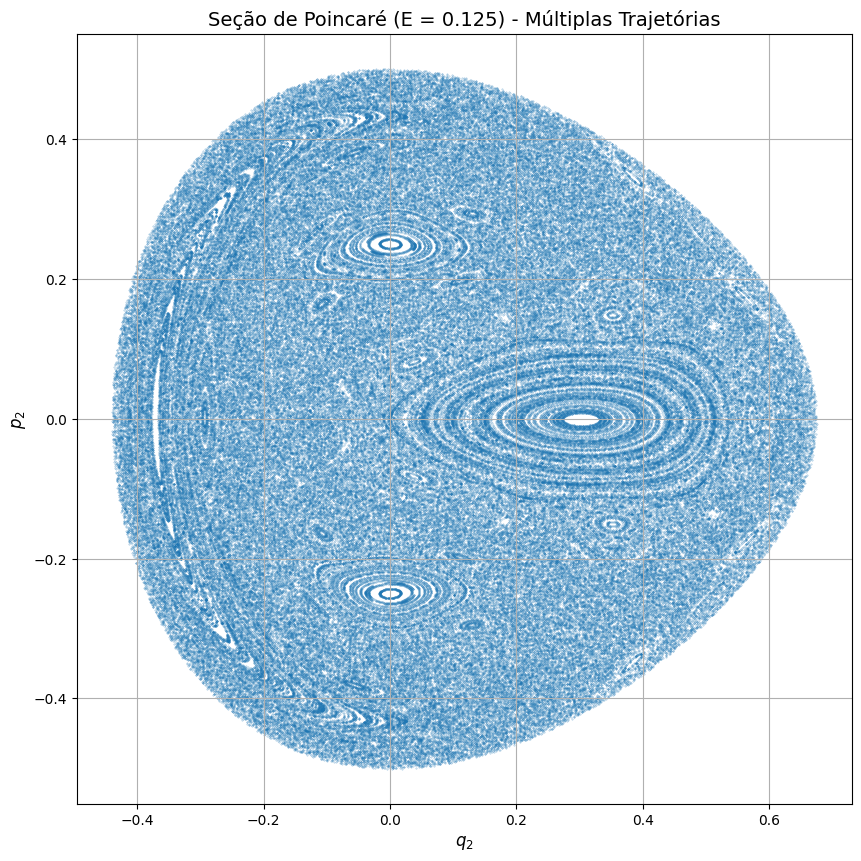

In [5]:
# Parâmetros da simulação
E_target = 0.125
dt = 0.01
num_steps = 10**5 

# Listas para armazenar os pontos de todas as simulações
all_q2_points = []
all_p2_points = []

# Geração de múltiplas condições iniciais em uma grade
q2_vals = np.linspace(-0.5, 0.5, 50)  # 50 pontos para q2
p2_vals = np.linspace(-0.5, 0.5, 50)  # 50 pontos para p2

num_valid_initials = 0
total_trajectories = len(q2_vals) * len(p2_vals)
trajectory_counter = 0

print("Iniciando a simulação de múltiplas trajetórias...")

for q2_0 in q2_vals:
    for p2_0 in p2_vals:
        trajectory_counter += 1
        
        # Calcular p1 para a energia desejada (E_target) e q1=0
        p1_sq = 2 * E_target - (p2_0**2 + q2_0**2) + (2/3) * q2_0**3
        
        if p1_sq >= 0:
            p1_calc = np.sqrt(p1_sq)
            # A condição é p1 >= 0
            initial_state = (0.0, q2_0, p1_calc, p2_0)
            
            # Executar a simulação para esta condição inicial
            print(f"  > Trajetória {trajectory_counter}/{total_trajectories}: Calculando pontos de Poincaré...")
            q2_points, p2_points = get_poincare_points(initial_state, E_target, dt, num_steps)
            
            # Adicionar os resultados às listas combinadas
            all_q2_points.extend(q2_points)
            all_p2_points.extend(p2_points)
            
            num_valid_initials += 1

print("Todas as simulações concluídas!")
print(f"Simuladas {num_valid_initials} trajetórias válidas.")
print(f"Número total de pontos na seção: {len(all_q2_points)}")

# Plotar os resultados combinados
plt.figure(figsize=(10, 10))
plt.scatter(all_q2_points, all_p2_points, s=0.1, alpha=0.5)
plt.xlabel('$q_2$', fontsize=12)
plt.ylabel('$p_2$', fontsize=12)
plt.title(f'Seção de Poincaré (E = {E_target}) - Múltiplas Trajetórias', fontsize=14)
plt.grid(True)
plt.show()

### 5.7. Seção de Poincaré para E = 0.16667

Por fim, vamos construir a seção de Poincaré para a energia $E=0.16667$, que corresponde a uma região com alta mistura caótica.

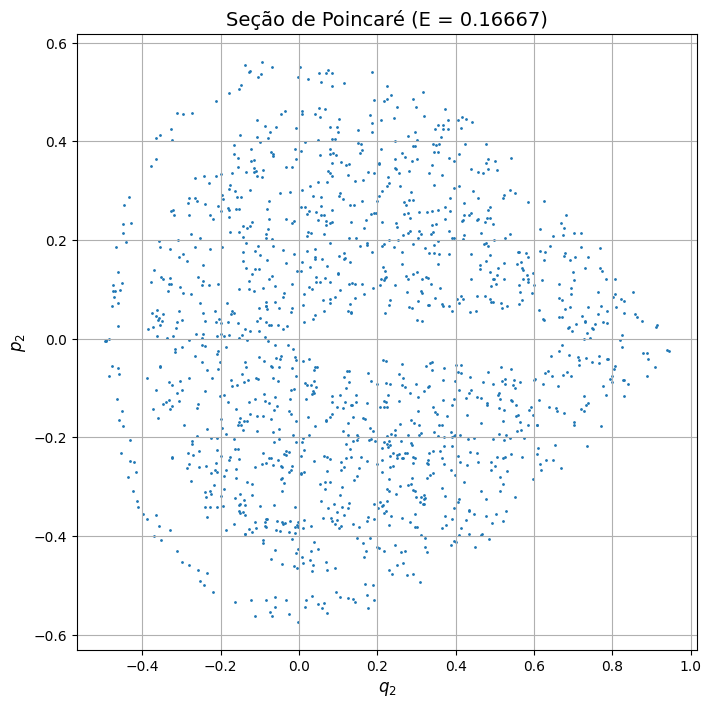

Número de pontos na seção: 1414


In [6]:
E_2 = 0.16667
dt = 0.01
num_steps = 10**6

# Condição inicial para E = 0.16667
# 0.16667 = 0.5 * (0.2**2 + p_2**2)
# 0.33334 = 0.04 + p_2**2
# p_2**2 = 0.29334 => p_2 = sqrt(0.29334) ~ 0.5416
q1_0, q2_0, p1_0, p2_0 = 0.0, 0.0, 0.2, np.sqrt(0.29334)

initial_state = (q1_0, q2_0, p1_0, p2_0)
q2_points, p2_points = get_poincare_points(initial_state, E_2, dt, num_steps)

# Plotar os resultados
plt.figure(figsize=(8, 8))
plt.scatter(q2_points, p2_points, s=1)
plt.xlabel('$q_2$', fontsize=12)
plt.ylabel('$p_2$', fontsize=12)
plt.title(f'Seção de Poincaré (E = {E_2})', fontsize=14)
plt.grid(True)
plt.show()

print(f"Número de pontos na seção: {len(q2_points)}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Adicione as funções do seu notebook aqui
def get_poincare_points(initial_state, E_target, dt, num_steps):
    # (código da sua função)
    q1, q2, p1, p2 = initial_state
    
    poincare_points_q2 = []
    poincare_points_p2 = []
    
    # Loop de integração
    for n in range(num_steps):
        # Armazena o estado anterior para detecção de cruzeiro
        q1_old, q2_old, p1_old, p2_old = q1, q2, p1, p2
        
        # Passo de integração principal
        q1_new = q1 + dt * p1
        q2_new = q2 + dt * p2
        p1_new = p1 - dt * (q1_new + 2 * q1_new * q2_new)
        p2_new = p2 - dt * (q2_new + q1_new**2 - q2_new**2)
        q1, q2, p1, p2 = q1_new, q2_new, p1_new, p2_new
        
        # Verifica a condição de cruzamento (passagem de q1=0)
        # e a condição p1 >= 0
        if q1_old * q1 < 0 and p1 >= 0:
            # Algoritmo de Hénon para encontrar o ponto exato
            # As variáveis independentes são dq_1
            # Passo de integração de "ajuste fino"
            d_q1 = 0 - q1_old
            
            # Use um passo de Euler para encontrar o ponto de interseção
            q2_intersec = q2_old + d_q1 * (p2_old / p1_old)
            p2_intersec = p2_old + d_q1 * (-(q2_old + q1_old**2 - q2_old**2) / p1_old)
            
            poincare_points_q2.append(q2_intersec)
            poincare_points_p2.append(p2_intersec)
            
    return poincare_points_q2, poincare_points_p2


E_list = [
    0.0050, 0.0070, 0.0089, 0.0100, 0.0117, 0.0133, 0.0148, 0.0167, 0.0183,
    0.0217, 0.0250, 0.0267, 0.0300, 0.0333, 0.0350, 0.0383, 0.0417, 0.0433,
    0.0467, 0.0500, 0.0517, 0.0550, 0.0583, 0.0600, 0.0633, 0.0667, 0.0683,
    0.0717, 0.0750, 0.0767, 0.0800, 0.0833, 0.0850, 0.0883, 0.0917, 0.0933,
    0.0967, 0.1000, 0.1017, 0.1050, 0.1083, 0.1100, 0.1133, 0.1167, 0.1183,
    0.1217, 0.1250, 0.1267, 0.1300, 0.1333, 0.1350, 0.1383, 0.1417, 0.1433,
    0.1467, 0.1500, 0.1517, 0.1550, 0.1583, 0.1600, 0.1633, 0.1667
]

# Parâmetros da simulação
dt = 0.01
num_steps = 10**6

# Geração de múltiplas condições iniciais em uma grade
q2_vals = np.linspace(-0.5, 0.5, 50)
p2_vals = np.linspace(-0.5, 0.5, 50)
total_trajectories = len(q2_vals) * len(p2_vals)

# Cria a pasta 'imagens' se ela não existir
output_dir = "imagens"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Pasta '{output_dir}' criada.")

for E_target in E_list:

    all_q2_points = []
    all_p2_points = []
    num_valid_initials = 0
    trajectory_counter = 0

    print(f"Iniciando simulações para E = {E_target}...")

    for q2_0 in q2_vals:
        for p2_0 in p2_vals:
            trajectory_counter += 1

            p1_sq = 2 * E_target - (p2_0**2 + q2_0**2) + (2/3) * q2_0**3

            if p1_sq >= 0:
                p1_calc = np.sqrt(p1_sq)
                initial_state = (0.0, q2_0, p1_calc, p2_0)

                print(f"  > E = {E_target}: Trajetória {trajectory_counter}/{total_trajectories}...")
                q2_points, p2_points = get_poincare_points(initial_state, E_target, dt, num_steps)

                all_q2_points.extend(q2_points)
                all_p2_points.extend(p2_points)

                num_valid_initials += 1

    if num_valid_initials > 0:
        plt.figure(figsize=(10, 10))
        plt.scatter(all_q2_points, all_p2_points, s=0.1, alpha=0.5)
        plt.xlabel('$q_2$', fontsize=12)
        plt.ylabel('$p_2$', fontsize=12)
        plt.title(f'Seção de Poincaré (E = {E_target})', fontsize=14)
        plt.grid(True)
        
        # Salva o gráfico com um nome de arquivo formatado
        filename = f'simulacao_H{E_target}.png'.replace('.', '_')
        filepath = os.path.join(output_dir, filename)
        plt.savefig(filepath, bbox_inches='tight')
        
        print(f"Gráfico salvo como '{filepath}'")
        plt.close() # Fecha a figura para não sobrecarregar a memória
        print(f"Concluído para E = {E_target}! Total de pontos: {len(all_q2_points)}\n")

    else:
        print(f"Nenhuma trajetória válida encontrada para E = {E_target}. Aumente o intervalo da grade ou a energia.\n")

Pasta 'imagens' criada.
Iniciando simulações para E = 0.005...
  > E = 0.005: Trajetória 1024/2500...
  > E = 0.005: Trajetória 1025/2500...
  > E = 0.005: Trajetória 1026/2500...
  > E = 0.005: Trajetória 1027/2500...
  > E = 0.005: Trajetória 1073/2500...
  > E = 0.005: Trajetória 1074/2500...
  > E = 0.005: Trajetória 1075/2500...
  > E = 0.005: Trajetória 1076/2500...
  > E = 0.005: Trajetória 1077/2500...
  > E = 0.005: Trajetória 1078/2500...
  > E = 0.005: Trajetória 1122/2500...
  > E = 0.005: Trajetória 1123/2500...
  > E = 0.005: Trajetória 1124/2500...
  > E = 0.005: Trajetória 1125/2500...
  > E = 0.005: Trajetória 1126/2500...
  > E = 0.005: Trajetória 1127/2500...
  > E = 0.005: Trajetória 1128/2500...
  > E = 0.005: Trajetória 1129/2500...
  > E = 0.005: Trajetória 1171/2500...
  > E = 0.005: Trajetória 1172/2500...
  > E = 0.005: Trajetória 1173/2500...
  > E = 0.005: Trajetória 1174/2500...
  > E = 0.005: Trajetória 1175/2500...
  > E = 0.005: Trajetória 1176/2500...
 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Adicione as funções do seu notebook aqui
def get_poincare_points(initial_state, E_target, dt, num_steps):
    # (código da sua função)
    q1, q2, p1, p2 = initial_state
    
    poincare_points_q2 = []
    poincare_points_p2 = []
    
    # Loop de integração
    for n in range(num_steps):
        # Armazena o estado anterior para detecção de cruzeiro
        q1_old, q2_old, p1_old, p2_old = q1, q2, p1, p2
        
        # Passo de integração principal
        q1_new = q1 + dt * p1
        q2_new = q2 + dt * p2
        p1_new = p1 - dt * (q1_new + 2 * q1_new * q2_new)
        p2_new = p2 - dt * (q2_new + q1_new**2 - q2_new**2)
        q1, q2, p1, p2 = q1_new, q2_new, p1_new, p2_new
        
        # Verifica a condição de cruzamento (passagem de q1=0)
        # e a condição p1 >= 0
        if q1_old * q1 < 0 and p1 >= 0:
            # Algoritmo de Hénon para encontrar o ponto exato
            d_q1 = 0 - q1_old
            
            # Use um passo de Euler para encontrar o ponto de interseção
            q2_intersec = q2_old + d_q1 * (p2_old / p1_old)
            p2_intersec = p2_old + d_q1 * (-(q2_old + q1_old**2 - q2_old**2) / p1_old)
            
            poincare_points_q2.append(q2_intersec)
            poincare_points_p2.append(p2_intersec)
            
    return poincare_points_q2, poincare_points_p2


E_list = [
    0.0050, 0.0070, 0.0089, 0.0100, 0.0117, 0.0133, 0.0148, 0.0167, 0.0183, 0,0188,
    0.0217, 0.0250, 0.0267, 0.0300, 0.0333, 0.0350, 0.0383, 0.0417, 0.0433,
    0.0467, 0.0500, 0.0517, 0.0550, 0.0583, 0.0600, 0.0633, 0.0667, 0.0683,
    0.0717, 0.0750, 0.0767, 0.0800, 0.0833, 0.0850, 0.0883, 0.0917, 0.0933,
    0.0967, 0.1000, 0.1017, 0.1050, 0.1083, 0.1100, 0.1133, 0.1167, 0.1183,
    0.1217, 0.1250, 0.1267, 0.1300, 0.1333, 0.1350, 0.1383, 0.1417, 0.1433,
    0.1467, 0.1500, 0.1517, 0.1550, 0.1583, 0.1600, 0.1633, 0.1667
]

# Parâmetros da simulação
dt = 0.01
num_steps = 10**6

# Geração de múltiplas condições iniciais em uma grade
q2_vals = np.linspace(-0.5, 0.5, 50)
p2_vals = np.linspace(-0.5, 0.5, 50)
total_trajectories = len(q2_vals) * len(p2_vals)

# Cria a pasta 'imagens' se ela não existir
output_dir = "imagens"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Pasta '{output_dir}' criada.")

# Define limites fixos para os eixos X e Y para todos os gráficos
# Isso garante que a escala não mude, o que é ideal para um GIF.
q2_min, q2_max = -0.6, 0.6
p2_min, p2_max = -0.6, 0.6

for E_target in E_list:

    all_q2_points = []
    all_p2_points = []
    num_valid_initials = 0
    trajectory_counter = 0

    print(f"Iniciando simulações para E = {E_target}...")

    for q2_0 in q2_vals:
        for p2_0 in p2_vals:
            trajectory_counter += 1

            p1_sq = 2 * E_target - (p2_0**2 + q2_0**2) + (2/3) * q2_0**3

            if p1_sq >= 0:
                p1_calc = np.sqrt(p1_sq)
                initial_state = (0.0, q2_0, p1_calc, p2_0)

                print(f"  > E = {E_target}: Trajetória {trajectory_counter}/{total_trajectories}...")
                q2_points, p2_points = get_poincare_points(initial_state, E_target, dt, num_steps)

                all_q2_points.extend(q2_points)
                all_p2_points.extend(p2_points)

                num_valid_initials += 1

    if num_valid_initials > 0:
        plt.figure(figsize=(10, 10))
        plt.scatter(all_q2_points, all_p2_points, s=0.1, alpha=0.5)
        
        # Define os limites de visualização fixos
        plt.xlim(q2_min, q2_max)
        plt.ylim(p2_min, p2_max)

        plt.xlabel('$q_2$', fontsize=12)
        plt.ylabel('$p_2$', fontsize=12)
        plt.title(f'Seção de Poincaré (E = {E_target})', fontsize=14)
        plt.grid(True)
        
        filename = f'simulacao_H{E_target}.png'.replace('.', '_')
        filepath = os.path.join(output_dir, filename)
        plt.savefig(filepath, bbox_inches='tight')
        
        print(f"Gráfico salvo como '{filepath}'")
        plt.close() # Fecha a figura para não sobrecarregar a memória
        print(f"Concluído para E = {E_target}! Total de pontos: {len(all_q2_points)}\n")

    else:
        print(f"Nenhuma trajetória válida encontrada para E = {E_target}. Aumente o intervalo da grade ou a energia.\n")

Pasta 'imagens' criada.
Iniciando simulações para E = 0.005...
  > E = 0.005: Trajetória 1024/2500...
  > E = 0.005: Trajetória 1025/2500...
  > E = 0.005: Trajetória 1026/2500...
  > E = 0.005: Trajetória 1027/2500...
  > E = 0.005: Trajetória 1073/2500...
  > E = 0.005: Trajetória 1074/2500...
  > E = 0.005: Trajetória 1075/2500...
  > E = 0.005: Trajetória 1076/2500...
  > E = 0.005: Trajetória 1077/2500...
  > E = 0.005: Trajetória 1078/2500...
  > E = 0.005: Trajetória 1122/2500...
  > E = 0.005: Trajetória 1123/2500...
  > E = 0.005: Trajetória 1124/2500...
  > E = 0.005: Trajetória 1125/2500...
  > E = 0.005: Trajetória 1126/2500...
  > E = 0.005: Trajetória 1127/2500...
  > E = 0.005: Trajetória 1128/2500...
  > E = 0.005: Trajetória 1129/2500...
  > E = 0.005: Trajetória 1171/2500...
  > E = 0.005: Trajetória 1172/2500...
  > E = 0.005: Trajetória 1173/2500...
  > E = 0.005: Trajetória 1174/2500...
  > E = 0.005: Trajetória 1175/2500...
  > E = 0.005: Trajetória 1176/2500...
 